<a href="https://colab.research.google.com/github/babupallam/Msc_AI_Module2_Natural_Language_Processing/blob/main/L10-Graph%20Convolutional%20Networks/Supporting_Documents/library_networkx/library_networkx_note__02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries for neural network operations
import torch
import torch.nn as nn
import torch.optim as optim
import networkx as nx
import numpy as np


# Demonstration 31: Graph Data as Input for Neural Networks
 To work with graphs in neural networks, we often need to convert graph data into matrices.


In [8]:

# Create a sample graph G with 4 nodes
G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0)])

# Convert the graph's adjacency matrix into a numpy array
adj_matrix = nx.adjacency_matrix(G);
print("Adjacency Matrix:\n", adj_matrix)
print("Shape of Adjacency Matrix:", adj_matrix.shape)

adj_matrix = adj_matrix.todense()
print("Adjacency Matrix: after applying todense()\n", adj_matrix)
print("Shape of Adjacency Matrix:", adj_matrix.shape)


Adjacency Matrix:
   (0, 1)	1
  (0, 3)	1
  (1, 0)	1
  (1, 2)	1
  (2, 1)	1
  (2, 3)	1
  (3, 0)	1
  (3, 2)	1
Shape of Adjacency Matrix: (4, 4)
Adjacency Matrix: after applying todense()
 [[0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]
 [1 0 1 0]]
Shape of Adjacency Matrix: (4, 4)


# Demonstration 32: Node Features in Graphs
 Node features are essential for training graph neural networks. Let's create some features for each node.


In [9]:

# Define node features as a simple numpy array (4 nodes, each with 2 features)
node_features = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
print("Node Features:\n", node_features)


Node Features:
 [[1 2]
 [3 4]
 [5 6]
 [7 8]]


# Demonstration 33: Converting Node Features to Torch Tensors
 Neural networks in PyTorch use tensors, so we need to convert node features and adjacency matrices to tensors.


In [10]:

# Convert node features to a tensor
node_features_tensor = torch.tensor(node_features, dtype=torch.float32)

# Convert adjacency matrix to tensor
adj_matrix_tensor = torch.tensor(adj_matrix, dtype=torch.float32)

print("Node Features Tensor:\n", node_features_tensor)
print("Adjacency Matrix Tensor:\n", adj_matrix_tensor)


Node Features Tensor:
 tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
Adjacency Matrix Tensor:
 tensor([[0., 1., 0., 1.],
        [1., 0., 1., 0.],
        [0., 1., 0., 1.],
        [1., 0., 1., 0.]])


# Demonstration 34: Building a Simple Graph Neural Network Layer
Let's define a simple neural network layer that can perform operations on graph data.


In [21]:
import torch
import torch.nn as nn

# Define a simple GNN layer class
class SimpleGNNLayer(nn.Module):
    """
    A simple Graph Neural Network (GNN) layer that applies a linear transformation to aggregated node features from neighboring nodes in a graph.
    """

    def __init__(self, in_features, out_features):
        """
        Initialize the GNN layer with the input and output feature dimensions.

        Parameters:
        - in_features (int): The number of features each input node has.
        - out_features (int): The number of features each output node will have after transformation.
        """
        super(SimpleGNNLayer, self).__init__()

        # Define a linear layer to apply transformations to the node features
        # This layer will map from `in_features` to `out_features`.
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x, adj):
        print("Inside the forward function")
        """
        Forward pass of the GNN layer, which performs aggregation of neighboring node features followed by a linear transformation.

        Parameters:
        - x (Tensor): Node feature matrix with shape (num_nodes, in_features).
          Each row corresponds to the features of a node.
        - adj (Tensor): Adjacency matrix with shape (num_nodes, num_nodes).
          The matrix indicates connections between nodes in the graph.

        Returns:
        - out (Tensor): The transformed node feature matrix with shape (num_nodes, out_features).
        """
        # Perform aggregation of neighbor features by multiplying adjacency matrix with the feature matrix.
        # This effectively sums the features of neighboring nodes for each node.
        out = torch.matmul(adj, x)
        print("Aggregated Features:\n", out)
        # Apply the linear transformation to the aggregated features.
        # This step adjusts the features to the desired output dimension.
        out = self.linear(out)

        return out

# Initialize a GNN layer with 2 input features and 4 output features.
# This means each node's initial feature vector has 2 values, and after the layer, each will have 6 values.
gnn_layer = SimpleGNNLayer(in_features=2, out_features=6)
print("Simple GNN Layer created.")


Simple GNN Layer created.


# Demonstration 35: Forward Pass through GNN Layer
We'll pass the node features and adjacency matrix through the GNN layer.


In [22]:
print("Node Features Tensor:\n", node_features_tensor)
print("Adjacency Matrix Tensor:\n", adj_matrix_tensor)
# Perform a forward pass
output = gnn_layer(node_features_tensor, adj_matrix_tensor)
print("Output after GNN layer:\n", output)


Node Features Tensor:
 tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
Adjacency Matrix Tensor:
 tensor([[0., 1., 0., 1.],
        [1., 0., 1., 0.],
        [0., 1., 0., 1.],
        [1., 0., 1., 0.]])
Inside the forward function
Aggregated Features:
 tensor([[10., 12.],
        [ 6.,  8.],
        [10., 12.],
        [ 6.,  8.]])
Output after GNN layer:
 tensor([[12.0235, -3.1484,  1.5169,  9.4490,  3.8257, -3.0649],
        [ 7.5461, -1.5947,  0.9551,  6.1475,  2.5892, -2.5219],
        [12.0235, -3.1484,  1.5169,  9.4490,  3.8257, -3.0649],
        [ 7.5461, -1.5947,  0.9551,  6.1475,  2.5892, -2.5219]],
       grad_fn=<AddmmBackward0>)


### **Explanation of how does it work?**


Certainly! Here’s an enhanced explanation, incorporating details on the creation of weights and biases, the role of neurons, and additional observations about the operations.

#### Inputs
- **Node Features Tensor**: Each row represents a node, and each column represents a feature.
  ```python
  tensor([[1., 2.],
          [3., 4.],
          [5., 6.],
          [7., 8.]])
  ```
  - We have 4 nodes, each with 2 features (e.g., values `[1., 2.]` for node 0). These initial features represent each node’s information, which could include properties or attributes relevant to the graph.

- **Adjacency Matrix Tensor**: Represents the connections between nodes.
  ```python
  tensor([[0., 1., 0., 1.],
          [1., 0., 1., 0.],
          [0., 1., 0., 1.],
          [1., 0., 1., 0.]])
  ```
  - This matrix indicates which nodes are connected:
    - For example, node 0 is connected to nodes 1 and 3, and node 1 is connected to nodes 0 and 2.
  - Since this is an undirected and unweighted adjacency matrix, it is symmetric, with values of `0` (no connection) or `1` (connection).

#### Step-by-Step Explanation Inside the `forward` Function

##### Step 1: Aggregating Features from Neighbors
The `forward` function first aggregates features from neighboring nodes using matrix multiplication with the adjacency matrix:
```python
out = torch.matmul(adj, x)
```
Here’s how this aggregation works:

1. **Matrix Multiplication (`torch.matmul(adj, x)`)**:
   - Each row in the resulting matrix is a sum of the features of the neighboring nodes for that row’s node.
   - For example:
     - **Node 0** has neighbors 1 and 3. Its aggregated features are the sum of node 1’s and node 3’s features:
       \[
       [3, 4] + [7, 8] = [10, 12]
       \]
     - **Node 1** has neighbors 0 and 2:
       \[
       [1, 2] + [5, 6] = [6, 8]
       \]
     - Nodes 2 and 3 follow the same pattern, producing aggregated features:
       ```python
       tensor([[10., 12.],
               [ 6.,  8.],
               [10., 12.],
               [ 6.,  8.]])
       ```

   - This aggregation step captures information from each node’s immediate neighbors, essential for graph-based learning tasks where node influence is based on connectivity.

##### Step 2: Applying Linear Transformation
Next, we pass the aggregated features through a linear layer:
```python
out = self.linear(out)
```
This linear transformation adjusts the feature dimensions from 2 to a higher dimensionality, with learned weights and biases defining the transformation. Let’s examine how this transformation works in detail.

1. **Weight and Bias Creation**:
   - The linear layer (`self.linear`) is defined in the initialization method (`__init__`):
     ```python
     self.linear = nn.Linear(in_features, out_features)
     ```
   - Here:
     - **`in_features = 2`**: The input feature dimension, corresponding to the 2 features per node.
     - **`out_features = 4`**: The output feature dimension, set to 4, meaning we want to expand each node’s feature representation to 4 dimensions.

   - **Neurons and Parameters**:
     - The `nn.Linear(in_features, out_features)` layer contains **4 neurons** (one for each output feature dimension), each with **2 weights** (for the two input features) and **1 bias**.
     - Therefore, this layer has:
       - **Weights**: A matrix of shape `(out_features, in_features)`, i.e., `(4, 2)`, resulting in \( 4 \times 2 = 8 \) weight parameters.
       - **Bias**: A vector of shape `(out_features,)`, i.e., `(4,)`, resulting in 4 bias parameters.
     - **Total Parameters**: 8 weights + 4 biases = 12 parameters in total for this layer, which are learned during training.

2. **Linear Transformation Operation**:
   - The linear transformation in `self.linear(out)` performs the following steps:
     - **Matrix Multiplication with Weights**:
       - The aggregated feature matrix of shape `(4, 2)` (4 nodes, each with 2 features) is multiplied by the weight matrix of shape `(4, 2)` (transposed to `(2, 4)` for compatibility).
       - This multiplication yields an output matrix of shape `(4, 4)`, representing each node’s transformed features in a higher-dimensional feature space.
     - **Adding Bias**:
       - A bias vector of shape `(4,)` is added to each row of the transformed matrix, shifting the values.

   - The final output after the linear transformation is:
     ```python
     tensor([[12.0235, -3.1484,  1.5169,  9.4490],
             [ 7.5461, -1.5947,  0.9551,  6.1475],
             [12.0235, -3.1484,  1.5169,  9.4490],
             [ 7.5461, -1.5947,  0.9551,  6.1475]],
            grad_fn=<AddmmBackward0>)
     ```
   - **Explanation of Output**:
     - Each row corresponds to a node, and each column corresponds to one of the 4 new feature dimensions produced by the linear transformation.
     - These values represent the updated feature embeddings for each node, learned from the aggregation of neighbor features and then transformed by the linear layer.

#### Summary of Each Step:
1. **Neighbor Aggregation**: Summed the features of each node’s neighbors using matrix multiplication with the adjacency matrix.
2. **Weight and Bias Creation**: The `nn.Linear` layer internally creates a weight matrix `(4, 2)` and bias vector `(4)`, resulting in a total of 12 parameters (8 weights and 4 biases) to learn.
3. **Linear Transformation**: The linear layer (with 4 neurons) adjusts the feature dimensions from 2 to 4 by applying matrix multiplication with learned weights, followed by adding bias, yielding the final transformed node features in the output tensor.

This process enables the GNN layer to learn complex, high-dimensional representations of each node by aggregating and transforming information from neighboring nodes, capturing structural and feature-based information from the graph structure.


# Demonstration 36: Stacking GNN Layers
 GNNs often use multiple stacked layers to learn more complex patterns.


In [45]:

class TwoLayerGNN(nn.Module):
    def __init__(self):
        super(TwoLayerGNN, self).__init__()
        self.layer1 = SimpleGNNLayer(in_features=2, out_features=6)
        self.layer2 = SimpleGNNLayer(in_features=6, out_features=1)

    def forward(self, x, adj):
        x = self.layer1(x, adj)
        x = torch.relu(x)  # Apply activation function
        x = self.layer2(x, adj)
        return x

# Initialize and test a two-layer GNN
two_layer_gnn = TwoLayerGNN()
output = two_layer_gnn(node_features_tensor, adj_matrix_tensor)
print("Output after Two-Layer GNN:\n", output)


print("Shape of outputs:", outputs.shape)
print("Shape of node_labels:", node_labels.shape)


Inside the forward function
Aggregated Features:
 tensor([[10., 12.],
        [ 6.,  8.],
        [10., 12.],
        [ 6.,  8.]])
Inside the forward function
Aggregated Features:
 tensor([[ 0.0000, 10.7863, 12.1743,  9.5225,  0.0000,  6.3963],
        [ 0.0000, 15.5433, 19.3663, 15.4491,  0.0000,  8.3092],
        [ 0.0000, 10.7863, 12.1743,  9.5225,  0.0000,  6.3963],
        [ 0.0000, 15.5433, 19.3663, 15.4491,  0.0000,  8.3092]],
       grad_fn=<MmBackward0>)
Output after Two-Layer GNN:
 tensor([[-0.4022],
        [-1.0680],
        [-0.4022],
        [-1.0680]], grad_fn=<AddmmBackward0>)
Shape of outputs: torch.Size([4, 2])
Shape of node_labels: torch.Size([4])


# Demonstration 37: Graph Classification Task Setup
 For a supervised learning task, we need labels for nodes or graphs.


In [46]:

# Define a target label for each node (e.g., 0 or 1)
node_labels = torch.tensor([0, 1, 0, 1], dtype=torch.float32)
print("Node Labels:", node_labels)


Node Labels: tensor([0., 1., 0., 1.])


# Demonstration 38: Defining Loss and Optimizer for the GNN Model
We'll define a loss function and an optimizer to train the GNN on the node classification task.


What does it do?

- Binary Cross-Entropy: This is a common loss function used for binary classification problems where you're trying to predict one of two classes (e.g., 0 or 1, True or False). It calculates the difference between the predicted probabilities and the actual labels (0 or 1).

- With Logits: The "logits" part is important. It means that this loss function expects the raw output from your neural network (before applying a sigmoid or softmax function to get probabilities). It internally applies a sigmoid activation to the output before calculating the loss, which is numerically more stable.

In [47]:

# Use binary cross-entropy loss for binary node classification
loss_fn = nn.BCEWithLogitsLoss()

print("Loss function defined.")
print("Loss function:", loss_fn)


print(two_layer_gnn.parameters()) #<generator object Module.parameters at 0x78a2e64b3450>


# Use Adam optimizer for training
optimizer = optim.Adam(two_layer_gnn.parameters(), lr=0.01)
print("Optimizer defined.")
print("Optimizer:", optimizer)

Loss function defined.
Loss function: BCEWithLogitsLoss()
<generator object Module.parameters at 0x78a2e64b2ea0>
Optimizer defined.
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)


# Demonstration 39: Training the GNN Model (Single Epoch)
We’ll perform one forward and backward pass to illustrate the training process.


In [57]:
# Forward pass
outputs = two_layer_gnn(node_features_tensor, adj_matrix_tensor).squeeze()
print("Outputs after forward pass:\n", outputs)
print("Shape of outputs:", outputs.shape)
print("Shape of node_labels:", node_labels.shape)

# Loss calculation
loss = loss_fn(outputs, node_labels)  # This function has been defined in Demonstration 38.

# Backward pass and optimization
optimizer.zero_grad()
loss.backward()
optimizer.step()

print("Loss after one training step:", loss.item())


Inside the forward function
Aggregated Features:
 tensor([[10., 12.],
        [ 6.,  8.],
        [10., 12.],
        [ 6.,  8.]])
Inside the forward function
Aggregated Features:
 tensor([[ 0.0000, 11.5861, 11.3093,  8.7095,  0.0000,  7.1753],
        [ 0.0000, 16.7894, 18.0296, 14.1840,  0.0000,  9.5250],
        [ 0.0000, 11.5861, 11.3093,  8.7095,  0.0000,  7.1753],
        [ 0.0000, 16.7894, 18.0296, 14.1840,  0.0000,  9.5250]],
       grad_fn=<MmBackward0>)
Outputs after forward pass:
 tensor([1.1054, 1.2325, 1.1054, 1.2325], grad_fn=<SqueezeBackward0>)
Shape of outputs: torch.Size([4])
Shape of node_labels: torch.Size([4])
Loss after one training step: 0.8236291408538818


#### Detailed Explanation

##### 1. Forward Pass
```python
outputs = two_layer_gnn(node_features_tensor, adj_matrix_tensor).squeeze()
```
- **Purpose**: This line performs a forward pass through the `two_layer_gnn` model, generating the predicted outputs for each node based on the input features and adjacency matrix.
- **Explanation**:
  - `two_layer_gnn`: This is an instance of a neural network model defined earlier. It processes the input graph data in a series of graph neural network (GNN) layers.
  - `node_features_tensor`: A tensor that represents the initial features for each node in the graph, typically of shape `(num_nodes, in_features)`, where each row corresponds to a node and each column to a feature.
  - `adj_matrix_tensor`: The adjacency matrix representing connections between nodes. It is used by GNN layers to aggregate features from neighboring nodes.
  - **`.squeeze()`**: This method removes any singleton dimensions from the tensor. For example, if `outputs` initially has a shape of `(4, 1)`, `.squeeze()` would make it `(4,)`. This is useful to ensure `outputs` has the same shape as `node_labels` for loss calculation.
- **Output**:
  - After this line, `outputs` contains the predictions from the GNN model for each node. The shape of `outputs` depends on the last layer of `two_layer_gnn`. If the last layer has a single output per node, `outputs` will have shape `(num_nodes,)` after `.squeeze()`.

```python
print("Outputs after forward pass:\n", outputs)
print("Shape of outputs:", outputs.shape)
print("Shape of node_labels:", node_labels.shape)
```
- **Purpose**: These lines print the predicted outputs after the forward pass and display the shapes of `outputs` and `node_labels`.
- **Explanation**:
  - `outputs.shape`: Displays the shape of the predicted outputs, which should match the shape of `node_labels` for compatibility in the loss calculation.
  - `node_labels.shape`: Displays the shape of the ground-truth labels to verify that it matches the output shape.

#3### 2. Loss Calculation
```python
loss = loss_fn(outputs, node_labels)  # This function has been defined in Demonstration 38.
```
- **Purpose**: This line calculates the loss, which measures the difference between the model's predictions (`outputs`) and the actual labels (`node_labels`).
- **Explanation**:
  - `loss_fn`: This is a loss function defined in an earlier demonstration. Based on your previous information, it’s likely `torch.nn.BCEWithLogitsLoss()` for binary classification.
  - **How `BCEWithLogitsLoss` Works**:
    - `BCEWithLogitsLoss` combines a sigmoid activation with binary cross-entropy loss, making it suitable for binary classification tasks. It takes raw logits (unactivated outputs) as input and applies a sigmoid internally to map predictions to probabilities between 0 and 1.
    - It then computes the binary cross-entropy loss between the predicted probabilities and the true labels.
  - **Expected Shape Match**:
    - `outputs` and `node_labels` should have the same shape for this function to work correctly. If `outputs` has a shape of `(4,)`, `node_labels` should also have a shape of `(4,)`.

##### 3. Backward Pass and Optimization
```python
optimizer.zero_grad()
```
- **Purpose**: This line resets the gradients of all model parameters to zero before performing backpropagation.
- **Explanation**:
  - During backpropagation, gradients are accumulated for each parameter. If we don’t reset them to zero, gradients from previous iterations will be added to the current ones, which is typically not desired.
  - `optimizer.zero_grad()` clears these gradients to ensure only the current step’s gradients are used.

```python
loss.backward()
```
- **Purpose**: This line performs backpropagation, calculating the gradients of the loss with respect to each parameter in the model.
- **Explanation**:
  - `loss.backward()` computes the derivative of the loss with respect to each parameter (weight and bias) in `two_layer_gnn` using the chain rule.
  - These gradients are stored in each parameter's `.grad` attribute, allowing the optimizer to update the parameters in the next step.

```python
optimizer.step()
```
- **Purpose**: This line updates the model’s parameters based on the gradients calculated during backpropagation.
- **Explanation**:
  - The `optimizer` (e.g., `torch.optim.Adam` or `torch.optim.SGD`) takes the gradients from each parameter’s `.grad` attribute and adjusts the parameters according to the chosen optimization algorithm.
  - This step reduces the loss by moving the model parameters in the direction that minimizes it, effectively “learning” from the data.

##### 4. Printing the Loss
```python
print("Loss after one training step:", loss.item())
```
- **Purpose**: This line outputs the loss value after one training step.
- **Explanation**:
  - `loss.item()`: Converts the PyTorch tensor containing the loss to a Python scalar, making it easier to display.
  - This printed value helps monitor the model’s progress during training. A decreasing loss over successive training steps typically indicates that the model is learning.


# Demonstration 40: Evaluating Model Predictions
After training, we need to evaluate the model predictions.


- outputs:
  - This represents the raw output from your two-layer GNN model. These outputs are often called logits and are not probabilities. They can range from negative infinity to positive infinity.

- torch.sigmoid(outputs):
  - This applies the sigmoid activation function to the outputs. The sigmoid function squashes the logits into a range between 0 and 1, effectively converting them into probabilities.


In [59]:

# Get predictions (output logits > 0.5 as class 1, else class 0)
predictions = (torch.sigmoid(outputs) > 0.5).int()
print("Predictions after one epoch:", predictions)
print("Actual labels:", node_labels.int())


Predictions after one epoch: tensor([1, 1, 1, 1], dtype=torch.int32)
Actual labels: tensor([0, 1, 0, 1], dtype=torch.int32)


# Demonstration 41: Implementing Graph Convolutional Layer


- In traditional Convolutional Neural Networks (CNNs), convolution is applied to grid-like data (e.g., images) using filters or kernels that slide over the data to capture local patterns.
- However, graphs are non-Euclidean structures, meaning they don’t have a regular grid structure.
- Instead, they have nodes (vertices) and edges, and each node can have a varying number of neighbors.
- Therefore, convolution on graphs is defined differently, often involving an "aggregation" of information from a node's neighbors.

### Graph Convolution: Key Concepts

- The **graph convolution** operation involves updating each node’s feature representation by aggregating information from its neighbors, which allows the network to learn features based on the graph structure.
- The process essentially smooths or propagates information across the graph, enabling nodes to gain insights from their neighbors.

### Steps in Graph Convolution

A graph convolution operation generally includes the following steps:

1. **Self-Loop Addition**:
   - In many graph convolution implementations, each node is connected to itself by adding self-loops in the adjacency matrix.
   - This allows each node to retain its own information in addition to the aggregated information from its neighbors.

2. **Normalization**:
   - Normalize the adjacency matrix to ensure that the feature aggregation doesn’t lead to exploding or vanishing values.
   - A common approach is to use **symmetric normalization**, which divides each row by the square root of the degree of the corresponding node.
   - The normalized adjacency matrix (often denoted as \( \hat{A} \)) helps balance the contributions from nodes with different numbers of neighbors, making the learning process more stable.

3. **Feature Aggregation**:
   - Multiply the normalized adjacency matrix with the node feature matrix. This step aggregates the features of neighboring nodes for each node.
   - The result is a new feature representation for each node that incorporates information from its local neighborhood.

4. **Linear Transformation**:
   - Apply a learnable linear transformation (via a fully connected layer) to the aggregated features.
   - This step projects the features to a new dimension and allows the network to learn meaningful representations of the nodes.

### Graph Convolution Implementation in Code


In [64]:
class GraphConvolution(nn.Module):
    def __init__(self, in_features, out_features):
        super(GraphConvolution, self).__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x, adj):
        # Step 1: Self-Loop Addition
        # Add self-loops to the adjacency matrix (by adding the identity matrix).
        # This ensures each node's representation includes its own features.
        adj_hat = adj + torch.eye(adj.size(0))  # Adds self-loops to the adjacency matrix

        # Step 2: Normalization
        # Calculate D^(-1/2) (inverse square root of the degree matrix).
        # This will be used to normalize the adjacency matrix.
        deg_inv_sqrt = torch.diag(torch.pow(adj_hat.sum(1), -0.5))

        # Normalize the adjacency matrix using symmetric normalization:
        # adj_norm = D^(-1/2) * adj_hat * D^(-1/2)
        #     - `D^(-1/2)` is the inverse square root of the degree matrix (`deg_inv_sqrt`).
        #     - `A_hat` is the adjacency matrix with self-loops (`adj_hat`).
        #     - This formula ensures that the normalized adjacency matrix has rows and columns that sum to approximately 1, effectively scaling the aggregated features.
        #  the @ symbol represents the matrix multiplication operator
        adj_norm = deg_inv_sqrt @ adj_hat @ deg_inv_sqrt

        # Step 3: Feature Aggregation
        # Multiply the normalized adjacency matrix with the feature matrix.
        # This aggregates features from each node's neighbors.
        out = adj_norm @ x  # (num_nodes, num_nodes) @ (num_nodes, in_features) -> (num_nodes, in_features)

        # Step 4: Linear Transformation
        # Apply the linear layer to transform the aggregated features to the output dimension.
        out = self.linear(out)  # (num_nodes, in_features) -> (num_nodes, out_features)

        return out


# Initialize a graph convolutional layer
# This layer will take in node features with 2 dimensions and output features with 4 dimensions.
gcn_layer = GraphConvolution(in_features=2, out_features=4)
print("Graph Convolutional Layer created.")

Graph Convolutional Layer created.



### Detailed Explanation of the Code

#### 1. Self-Loop Addition
```python
adj_hat = adj + torch.eye(adj.size(0))
```
- `adj + torch.eye(adj.size(0))` adds the identity matrix to the adjacency matrix `adj`, effectively adding self-loops. This means each node will aggregate its own features along with those of its neighbors.
- `adj_hat` is the adjacency matrix with self-loops, represented as \( \hat{A} \).

#### 2. Normalization
```python
deg_inv_sqrt = torch.diag(torch.pow(adj_hat.sum(1), -0.5))
adj_norm = deg_inv_sqrt @ adj_hat @ deg_inv_sqrt
```
- `adj_hat.sum(1)`: Computes the degree of each node (i.e., the number of edges for each node).
- `torch.pow(..., -0.5)`: Takes the inverse square root of each degree. This gives us \( D^{-1/2} \), where \( D \) is the degree matrix.
- `deg_inv_sqrt`: Creates a diagonal matrix with these values.
- `adj_norm = deg_inv_sqrt @ adj_hat @ deg_inv_sqrt`: Performs symmetric normalization on `adj_hat`, yielding \( D^{-1/2} \hat{A} D^{-1/2} \). This normalized adjacency matrix is used to stabilize the training process by balancing the contributions from nodes with varying degrees.

#### 3. Feature Aggregation
```python
out = adj_norm @ x
```
- `adj_norm @ x`: Multiplies the normalized adjacency matrix with the feature matrix `x`.
  - This operation aggregates the features of neighboring nodes for each node based on the structure of `adj_norm`.
  - For each node, this sums up the features from its neighbors (as defined by `adj_norm`), giving a new feature representation that incorporates information from the neighborhood.

#### 4. Linear Transformation
```python
out = self.linear(out)
```
- `self.linear(out)`: Applies a learnable linear transformation to the aggregated features.
  - This step maps the aggregated features to a new dimensional space (`out_features`), allowing the model to learn complex representations based on the graph structure.
  - The linear transformation has a weight matrix and a bias vector, both of which are learned during training. The weights adjust how much influence each feature has, and the bias shifts the overall feature values.

### Summary of the Graph Convolution Operation
1. **Self-Loop Addition**: Adds self-loops to the adjacency matrix to retain each node’s own features during aggregation.
2. **Normalization**: Uses the degree matrix to normalize the adjacency matrix, ensuring that the contribution from each node's neighbors is balanced.
3. **Feature Aggregation**: Aggregates features from neighboring nodes based on the normalized adjacency matrix, resulting in a new feature representation for each node that includes information from its local neighborhood.
4. **Linear Transformation**: Applies a learnable linear transformation to the aggregated features, projecting them into a new feature space that can be used in subsequent layers or for prediction.

This `GraphConvolution` layer is a key building block in Graph Convolutional Networks (GCNs), enabling each node to learn from its neighbors and capture local graph structure, ultimately allowing for effective learning on graph data.

# Demonstration 42: Forward Pass through Graph Convolutional Layer
 Perform a forward pass through the GCN layer using our node features and adjacency matrix.


In [66]:
print("Node Features:\n", node_features_tensor)
print("Adjacency Matrix:\n", adj_matrix_tensor)
# Pass node features and adjacency matrix through the GCN layer
output_gcn = gcn_layer(node_features_tensor, adj_matrix_tensor)
print("Output after GCN layer:\n", output_gcn)


Node Features:
 tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
Adjacency Matrix:
 tensor([[0., 1., 0., 1.],
        [1., 0., 1., 0.],
        [0., 1., 0., 1.],
        [1., 0., 1., 0.]])
Output after GCN layer:
 tensor([[ 3.1062, -0.8937,  2.5748,  2.0371],
        [ 2.6560, -0.8154,  2.2127,  1.6671],
        [ 4.0065, -1.0504,  3.2990,  2.7770],
        [ 3.5563, -0.9721,  2.9369,  2.4071]], grad_fn=<AddmmBackward0>)


The last output:

- It is the output feature matrix after the GCN layer has processed the node features and adjacency matrix.
- Each row represents a node, and each column represents one of the new features after the graph convolution.
- In this case, each node now has 4 features instead of the original 2, because the GCN layer was designed to output 4 features per node (out_features=4).
- Explanation of Each Step Leading to This Output:
  - The GCN layer aggregates features from each node's neighbors based on the adjacency matrix.
  - It then applies a linear transformation to map the aggregated features to a new feature space of dimension 4.
- Each element in this output tensor is the result of:
  - Neighbor Aggregation: Aggregating information from the neighbors of each node.
  - Transformation: Applying a learned weight matrix and bias to transform the aggregated features.

# Demonstration 43: Building a Two-Layer GCN Model
 Let's stack two GCN layers to build a simple GCN model.


In [71]:

class TwoLayerGCN(nn.Module):
    def __init__(self):
        super(TwoLayerGCN, self).__init__()
        self.gcn1 = GraphConvolution(in_features=2, out_features=4)
        self.gcn2 = GraphConvolution(in_features=4, out_features=1)

    def forward(self, x, adj):
        x = self.gcn1(x, adj)
        x = torch.relu(x)  # Apply activation function
        x = self.gcn2(x, adj)
        return x

# Initialize the two-layer GCN
two_layer_gcn = TwoLayerGCN()
print("Two-Layer GCN created.")

# out_features =1 is for binary classification


Two-Layer GCN created.


# Demonstration 44: Training the Two-Layer GCN
 We’ll train this GCN model for a few epochs to see how it learns on a simple classification task.


In [70]:

# Define the loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(two_layer_gcn.parameters(), lr=0.01)

# Training loop for 5 epochs
for epoch in range(5):
    outputs = two_layer_gcn(node_features_tensor, adj_matrix_tensor).squeeze()
    loss = loss_fn(outputs, node_labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch + 1}, Loss: {loss.item()}")


Epoch 1, Loss: 0.7165266275405884
Epoch 2, Loss: 0.7076399326324463
Epoch 3, Loss: 0.7002691030502319
Epoch 4, Loss: 0.6944364309310913
Epoch 5, Loss: 0.6901254653930664


# Demonstration 45: Evaluating GCN Model Predictions
 After training, let's check the model's predictions on the node classification task.


In [78]:
print("Node Features:\n", node_features_tensor)
print("Adjacency Matrix:\n", adj_matrix_tensor)
# Get final predictions after training
outputs = two_layer_gcn(node_features_tensor, adj_matrix_tensor);
print("Final Outputs after training:\n", outputs)
outputs = outputs.squeeze()
print("Final Outputs after squeezing:\n", outputs)


predictions = (torch.sigmoid(outputs) > 0.5).int()
print("Final Predictions:", predictions)
print("Actual Labels:", node_labels.int())


Node Features:
 tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
Adjacency Matrix:
 tensor([[0., 1., 0., 1.],
        [1., 0., 1., 0.],
        [0., 1., 0., 1.],
        [1., 0., 1., 0.]])
Final Outputs after training:
 tensor([[0.6885],
        [0.7246],
        [0.7607],
        [0.7968]], grad_fn=<AddmmBackward0>)
Final Outputs after squeezing:
 tensor([0.6885, 0.7246, 0.7607, 0.7968], grad_fn=<SqueezeBackward0>)
Final Predictions: tensor([1, 1, 1, 1], dtype=torch.int32)
Actual Labels: tensor([0, 1, 0, 1], dtype=torch.int32)


# Demonstration 46: Visualizing Node Embeddings
 Node embeddings are the learned representations from the GCN, useful for visualization and downstream tasks.


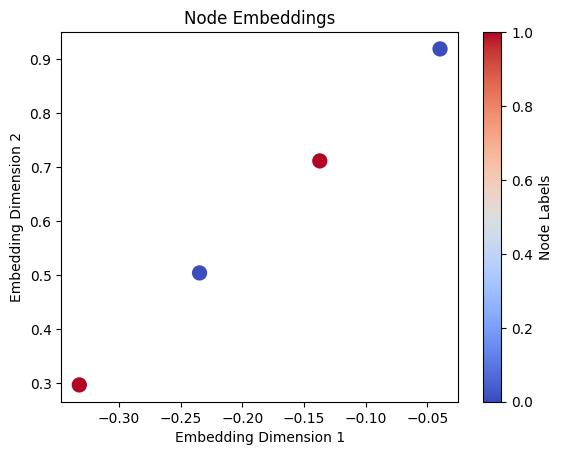

In [79]:

import matplotlib.pyplot as plt

# Get node embeddings (output of the first GCN layer)
# We use torch.no_grad() to disable gradient tracking for this part of the code.
# This is because we are not updating the model weights here; we only need the output for visualization.
with torch.no_grad():
    # Pass the input features and adjacency matrix through the first GCN layer of the two-layer GCN model.
    # This will generate the node embeddings after the first graph convolution operation.
    embeddings = two_layer_gcn.gcn1(node_features_tensor, adj_matrix_tensor)

    # Convert the embeddings tensor to a numpy array for easier plotting with matplotlib.
    embeddings = embeddings.numpy()

# Visualize the embeddings using a scatter plot
# Each node will be represented as a point in a 2D space, with colors representing their labels.
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=node_labels, cmap="coolwarm", s=100)

# Set plot title and axis labels
plt.title("Node Embeddings")  # Title of the plot
plt.xlabel("Embedding Dimension 1")  # Label for the x-axis (first dimension of the embeddings)
plt.ylabel("Embedding Dimension 2")  # Label for the y-axis (second dimension of the embeddings)

# Add a color bar to indicate node labels
# The color bar will show the mapping between colors and node labels (if labels are provided).
plt.colorbar(label="Node Labels")

# Display the plot
plt.show()



### Analysis
1. **Embedding Separation**:
   - The nodes in the graph are mapped to a 2D space where nodes with similar labels (as indicated by colors) tend to be closer together.
   - This suggests that the GCN layer has successfully learned to distinguish nodes based on their label information, indicating that it captures some meaningful patterns in the graph structure.

2. **Clusters Based on Labels**:
   - We observe two main color groups in the plot: blue (label close to 0) and red (label close to 1).
   - The nodes labeled in blue occupy the left side of the plot, while the nodes labeled in red occupy the right side.
   - This clear separation implies that the GCN is able to group nodes with similar characteristics, which is promising for tasks like classification, where we want nodes with similar labels to be close in the embedding space.

3. **Distinctness of Groups**:
   - The embeddings are spread out along both the x and y axes, which indicates that each dimension is contributing to distinguishing the nodes.
   - The presence of both distinct clusters and intermediate points (e.g., nodes that are not perfectly clustered) suggests that there may be some overlap or shared characteristics between nodes of different labels.

### Insights
1. **Effectiveness of GCN in Capturing Local Graph Structure**:
   - The GCN layer effectively learns to differentiate nodes by aggregating information from neighbors. The separation of blue and red clusters implies that nodes of similar types or labels influence each other through the graph structure.

2. **Potential for Node Classification**:
   - Since the GCN is clustering nodes with the same labels, this embedding could be used as a basis for a classification model. Nodes with unknown labels could potentially be classified by checking which cluster they are closest to in this embedding space.

3. **Areas for Improvement**:
   - While there is some separation, there is also a degree of overlap or intermediate points. Additional layers, more training, or hyperparameter tuning might further improve separation between classes.
   - Alternatively, a higher-dimensional embedding could be used if further separation is desired, especially in more complex or densely connected graphs.


# Demonstration 48: Graph Pooling with Mean Pooling
Mean pooling is another common pooling method that averages the node features.


In [90]:
# Display the initial node features
print("Node Features:\n", node_features_tensor)

# Mean Pooling: Calculate the average feature vector across all nodes
# This approach is often used to create a single, unified representation for the entire graph.
# By averaging the feature vectors of all nodes, we capture a general representation that summarizes the graph as a whole.

# Calculate the mean of node features along the 0th dimension (rows)
# This means we're taking the average value for each feature across all nodes.
graph_representation = node_features_tensor.mean(dim=0)

# Print the graph-level representation obtained through mean pooling
print("Graph-level Representation (Mean Pooling):", graph_representation)
# Example output (if the mean was calculated):
# tensor([4., 5.])  # This represents the average features for the graph as a whole

# Explanation:
# - Here, `dim=0` specifies that we want to calculate the mean across rows (i.e., across nodes),
#   which gives us a single feature vector that represents the entire graph.
# - If `node_features_tensor` has shape `(num_nodes, num_features)`, the result of mean pooling
#   will be a tensor of shape `(num_features,)`, providing one averaged feature value for each feature dimension.



Node Features:
 tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
Graph-level Representation (Mean Pooling): tensor([4., 5.])



#### Insight:
 - This graph-level representation is useful for graph classification tasks, where we need to classify the entire graph instead of individual nodes.
 - By averaging the features of all nodes, we obtain a compact summary that can be used as input for a classification model.

#### Practical Example:
 - Imagine each node represents a molecule's atom, and each feature represents some property of the atom (like charge).
 - Mean pooling allows us to create a single vector summarizing the whole molecule's properties, which we could use  to classify the molecule as toxic, reactive, etc.

# Demonstration 49: Graph Classification Task Setup
 For graph classification, we can use pooling layers to aggregate node-level embeddings into a graph-level representation.


In [91]:

# After training a GNN on node-level embeddings, apply sum or mean pooling for a graph-level task.
class GraphClassifier(nn.Module):
    def __init__(self):
        super(GraphClassifier, self).__init__()
        self.gcn1 = GraphConvolution(2, 4)
        self.gcn2 = GraphConvolution(4, 2)
        self.fc = nn.Linear(2, 1)  # Final layer for binary classification

    def forward(self, x, adj):
        x = self.gcn1(x, adj)
        x = torch.relu(x)
        x = self.gcn2(x, adj)
        x = x.mean(dim=0)  # Mean pooling for graph-level representation
        x = self.fc(x)
        return x

# Initialize the graph classifier
graph_classifier = GraphClassifier()
print("Graph Classifier Model created.")


Graph Classifier Model created.


# Demonstration 50: Training Graph Classifier Model
 We’ll train the graph classifier model on a simple binary classification task.


In [96]:
# Define label for the graph (e.g., 1 for "positive class")
# The label should be a tensor with shape [1] to match the output of the model
graph_label = torch.tensor([1.0])  # Wrap the label in a list to create a tensor with shape [1]

# Define loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(graph_classifier.parameters(), lr=0.01)

# Training loop for 10 epochs
for epoch in range(10):
    # Forward pass through the graph classifier
    output = graph_classifier(node_features_tensor, adj_matrix_tensor)

    # Calculate loss between the output and graph label
    loss = loss_fn(output, graph_label)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch + 1}, Loss: {loss.item()}")

Epoch 1, Loss: 0.5365514159202576
Epoch 2, Loss: 0.5244860649108887
Epoch 3, Loss: 0.5124693512916565
Epoch 4, Loss: 0.5005095601081848
Epoch 5, Loss: 0.4886152744293213
Epoch 6, Loss: 0.47679460048675537
Epoch 7, Loss: 0.46505600214004517
Epoch 8, Loss: 0.45340776443481445
Epoch 9, Loss: 0.4418579339981079
Epoch 10, Loss: 0.4304148852825165
